In [1]:
import lorm
from nfft import nfft
import disc.energy_curveling_2d
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def sampleCircle(num):
    t = np.linspace(0,2*np.pi,num,endpoint=False)
    coords = np.zeros([num,2])
    coords[:,1] = np.cos(t)
    coords[:,0] = np.sin(t)
    return coords

In [95]:
mu_m = 200
mu = 0.4*sampleCircle(mu_m) + 0.1*(np.random.rand(mu_m,2)-0.5)
#mu = 0.3*np.array([[-1,-1],[-1,1],[1,-1],[1,1]])

mu_N_half = 64
nfft2d = nfft.NFFT2D(mu_m,2*mu_N_half,2*mu_N_half)
nfft2d.x = mu
nfft2d.precompute_x()
nfft2d.f = np.ones(mu_m,dtype=np.complex)/mu_m
nfft2d.adjoint()
mu_hat = np.zeros([2*mu_N_half,2*mu_N_half],dtype=np.complex)
mu_hat[:] = nfft2d.f_hat/nfft2d.f_hat[mu_N_half,mu_N_half]

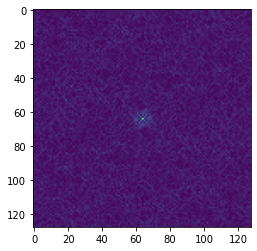

In [96]:
%matplotlib inline
plt.imshow(np.abs(mu_hat))

In [106]:
e2 = lorm.manif.EuclideanSpace(2)
points = lorm.manif.ManifoldPointArray(e2)
points.coords = 0.2*sampleCircle(100)

In [107]:
N_half = 16
N=2*N_half
m = points.coords.shape[0]
energy = disc.energy_curveling_2d.plan(m,N,0.5,1)
if mu_N_half >= N_half:
    energy._mu_hat[:] = mu_hat[mu_N_half-N_half:mu_N_half+N_half,mu_N_half-N_half:mu_N_half+N_half]
else:
    energy._mu_hat[N_half-mu_N_half:N_half+mu_N_half,N_half-mu_N_half:N_half+mu_N_half] = mu_hat[:]

<IPython.core.display.Javascript object>


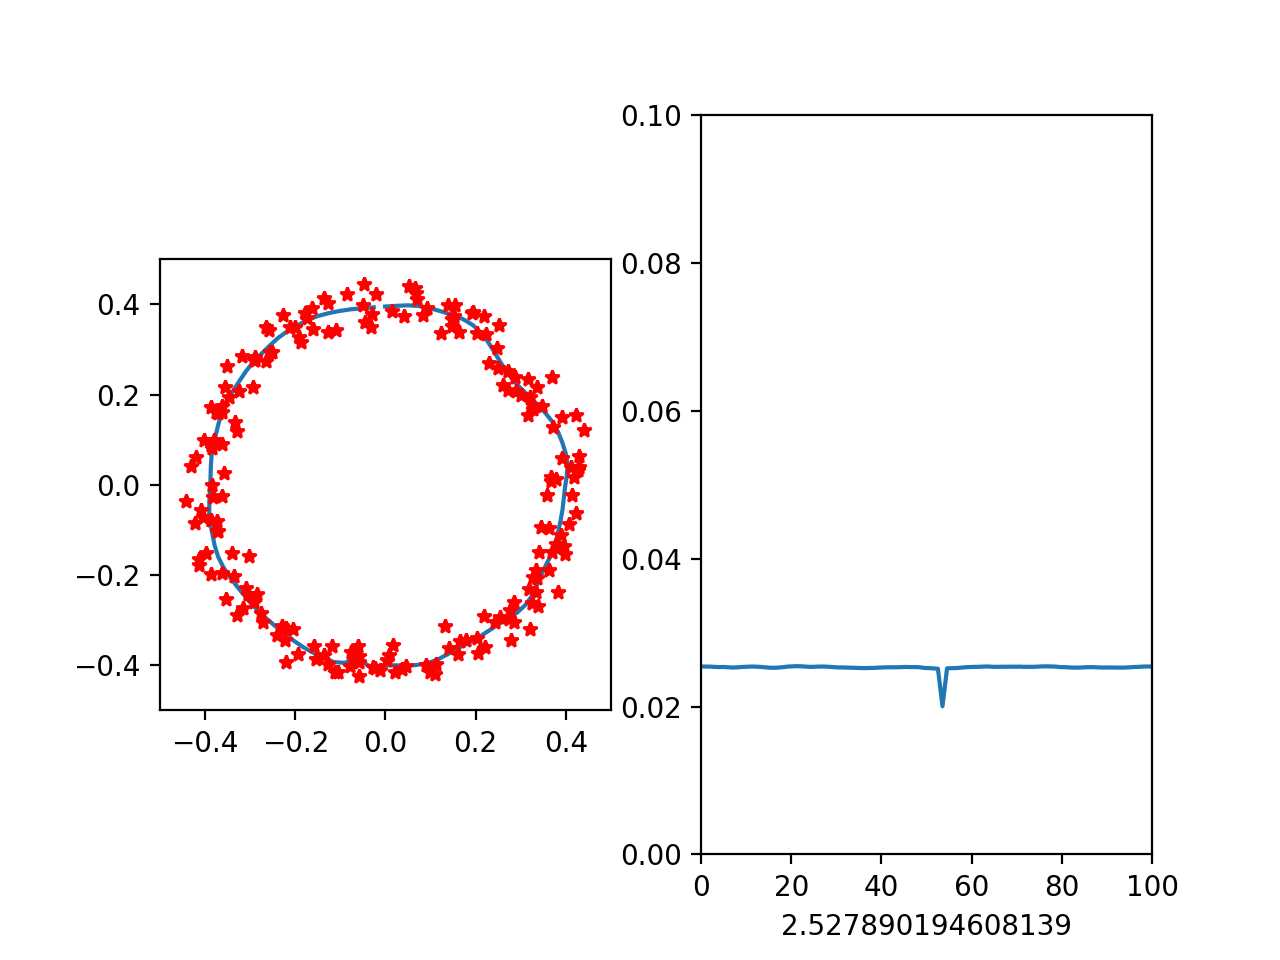

In [108]:
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(121)
#ax.axis(np.array([-0.28,-0.26,0.26,0.28]))
#ax.axis(np.array([0.21,0.24,-0.44,-0.42]))
ax.axis(np.array([-0.5,0.5,-0.5,0.5]))
ax.axes.set_aspect(1)
line = plt.Line2D(points.coords[:,0],points.coords[:,1])#,marker='*',markersize=2)
line_mu = plt.Line2D(mu[:,0],mu[:,1],marker='*',markersize=5,linewidth=0,color='red')
ax.add_line(line)
ax.add_line(line_mu)

bx = fig.add_subplot(122)
#bx.axis(np.array([900,950,0.0045,0.0015]))
bx.axis(np.array([0,m,0.000,1/np.sqrt(m)]))
bx.set_xlabel(np.sum(energy._eval_lengths(points.coords)))
distance = plt.Line2D(np.linspace(0,m,m),energy._eval_lengths(points.coords))
bx.add_line(distance)
def update_points(p):
    line.set_xdata(p.coords[:,0])
    line.set_ydata(p.coords[:,1])
    distance.set_ydata(energy._eval_lengths(p.coords))
    bx.set_xlabel(np.sum(energy._eval_lengths(p.coords)))
    fig.canvas.draw()
    return


In [122]:
energy._alpha =1
energy._L = 0.4*2*np.pi
method= lorm.optim.ConjugateGradientMethod(max_iter=50,tol_grad=1e-12)
method.listener = update_points
for i in range(1):
    points = method.run(energy,points)

Initial value: f[0] = 0.017359069698990946
f[1] = 0.016386854616146154
f[2] = 0.015357113651630663
f[3] = 0.014424760334031617
f[4] = 0.013480708301479159
f[5] = 0.012694661117714062
f[6] = 0.012198448629523703
f[7] = 0.011894577602600685
f[8] = 0.011653022383855524
f[9] = 0.011480525345434978
f[10] = 0.011347527863487849
f[11] = 0.01123979260050794
f[12] = 0.011148990928060029
f[13] = 0.011073392208285451
f[14] = 0.011004010084979216
f[15] = 0.010955242900440556
f[16] = 0.01092249759825183
f[17] = 0.010896563816656164
f[18] = 0.010876123089776441
f[19] = 0.010848402796358906
f[20] = 0.010833682488752614
f[21] = 0.010819722736657867
f[22] = 0.010804171389267935
f[23] = 0.010790937812693718
f[24] = 0.010778609879459809
f[25] = 0.010770354137547886
f[26] = 0.010764989683053058
f[27] = 0.010758599885078789
f[28] = 0.01075243397361134
f[29] = 0.010747037461257004
f[30] = 0.010741924846081698
f[31] = 0.010737016335019235
f[32] = 0.010732647872325694
f[33] = 0.010728261474336321
f[34] = 0.01

In [129]:
#points_new.coords = temp
tempc = points.coords
m2 = len(tempc)
temp = np.zeros([2*m2,2])
for i in range(m2):
    temp[2*i,:] = tempc[i,:]
for i in range(m2-1):
    temp[2*i+1,:] = (tempc[i,:]+tempc[i+1,:])/2
temp[2*m2-1,:] = (tempc[0,:]+tempc[m2-1,:])/2

m = len(temp)
points.coords = temp